#  Определение параметров успешной игры

<a id=plan></a>
# План работы

[**Шаг 1. Открыть файл с данными и изучите общую информацию**](#step1)
- [x] файл открыт, получено первое представление о содержимом 
- [x] поиск пропусков, дубликатов, некорректных значений и т.п.

[**Шаг 2. Подготовка данных**](#step2)
- [x] привести названия столбцов к нижнему регистру
- [x] преобразовать данные в нужный тип (описать, в каких столбцах произведена замена  и почему)
- [x] обработать пропуски (описать как обработаны и почему именно так; высказать предположение о причине появления пропусков) 
- [x] аббревиатура "tbd" в столбце с рейтингом обработана
- [x] объединены рейтинг "E" & "K-A" в столбце с рейтингом ESRB обработана
- [x] посчитать суммарные продажи во всех регионах и добавить их в отедльный столбец
- [x] привести значения столбца user_score к одному формату с critic_score

[**Шаг 3. EDA**](#step3)
- [x] узнать сколько игр выпускалось в разные года. (Дать ответ на вопросы : "Важны ли данные за все периоды?")
- [x] изучить динамику продаж игр по платформам в разные года
- [x] выбрать платформы с наибольшими суммарными продажами и построить распределение по годам
- [x] указать за какой характерный срок появляются новые и исчезают старые платформы
- [x] определить актуальный период для анализа
- [x] определить какие платформы лидируют по продажам, растут или падают
- [x] определить потенциально прибыльные платформы 
- [x] построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам, описать результат
- [x] изучить влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы
- [x] построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами
- [x] соотнести выводы с продажами игр на других платформах
- [x] изучить распределение игр по жанрам. Какой самый прибыльный жанр? Выделяются ли жанры с высокими и низкими продажами?


[**Шаг 4. Составить портрет пользователя каждого региона**](#step4)
(NA, EU, JP):

- [x] Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- [x] Самые популярные жанры (топ-5). Поясните разницу.
- [x] Влияет ли рейтинг ESRB на продажи в отдельном регионе?

[**Шаг 5. Проверка гипотез**](#step5)

- [x] Проверить гипотезу `Средние пользовательские рейтинги платформ Xbox One и PC одинаковые`
- [x] Проверить гипотезу `Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные`


**Шаг 6. Общий вывод**
- [x] Определить факторы, влияющие на успех игры

<a id=step1></a>
# Шаг 1. Изучение доступных данных

In [1]:
# импорт необходимых библиотек и настройка jupiter
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st
import numpy as np 
# pip install sidetable
import sidetable


# для отображения в jupiter всех колонок и столбцов df + сокращу количество цифр после запятой
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision',2)

In [2]:
# создание датасета для анализа и первый взгляд
games = pd.read_csv('datasets\games.csv')
games.sample(5)

Name Platform  \
1366                 Sonic's Ultimate Genesis Collection     X360   
16241                                             NHL 16      PS3   
4292               American Girl: Kit Mystery Challenge!       DS   
688                                         Guild Wars 2       PC   
15272  Quiz Present Variety Q-Sama!! DS: Pressure Stu...       DS   

       Year_of_Release      Genre  NA_sales  EU_sales  JP_sales  Other_sales  \
1366            2009.0       Misc      0.85      0.43      0.00         0.13   
16241           2015.0     Sports      0.00      0.01      0.00         0.00   
4292            2008.0  Adventure      0.42      0.00      0.00         0.03   
688             2012.0     Action      0.96      1.07      0.00         0.27   
15272           2011.0       Misc      0.00      0.00      0.02         0.00   

       Critic_Score User_Score Rating  
1366           79.0        8.5   E10+  
16241           NaN        NaN    NaN  
4292            NaN        tbd      E  
688            90.0        7.9      T  
15272           NaN        NaN    NaN

In [3]:
print('Количество дублей:', games.duplicated().sum())

Количество дублей: 0


In [4]:
games.describe()

Year_of_Release  NA_sales  EU_sales  JP_sales  Other_sales  \
count         16446.00  16715.00  16715.00  16715.00     16715.00   
mean           2006.48      0.26      0.15      0.08         0.05   
std               5.88      0.81      0.50      0.31         0.19   
min            1980.00      0.00      0.00      0.00         0.00   
25%            2003.00      0.00      0.00      0.00         0.00   
50%            2007.00      0.08      0.02      0.00         0.01   
75%            2010.00      0.24      0.11      0.04         0.03   
max            2016.00     41.36     28.96     10.22        10.57   

       Critic_Score  
count       8137.00  
mean          68.97  
std           13.94  
min           13.00  
25%           60.00  
50%           71.00  
75%           79.00  
max           98.00

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Вывод
В `Year_of_Release`, `Critic_Score`нужно заменить тип данных на целочисленный. Так как значения в данных столбцах не имеют дробной части.

Дублей нет. 

Есть пропуски в столбце `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.
Гипотизы о причине их возникновнения и способы обработки обсудим на следующем шаге. 


[План работы](#plan)

<a id=step1></a>
# Шаг 2. Подготовка данных

Меняем регистр в названии колонок на нижний и проверяем результат

In [6]:
games.columns=games.columns.str.lower()
games.sample()

name platform  year_of_release genre  na_sales  eu_sales  \
8438  Bomberman Land      Wii           2007.0  Misc      0.11      0.01   

      jp_sales  other_sales  critic_score user_score rating  
8438      0.03         0.01          57.0          8      E

In [7]:
games.loc[games['year_of_release'].isna()].head(10)

name platform  year_of_release  \
183                              Madden NFL 2004      PS2              NaN   
377                             FIFA Soccer 2004      PS2              NaN   
456                   LEGO Batman: The Videogame      Wii              NaN   
475                   wwe Smackdown vs. Raw 2006      PS2              NaN   
609                               Space Invaders     2600              NaN   
627                                    Rock Band     X360              NaN   
657     Frogger's Adventures: Temple of the Frog      GBA              NaN   
678  LEGO Indiana Jones: The Original Adventures      Wii              NaN   
719                               Call of Duty 3      Wii              NaN   
805                                    Rock Band      Wii              NaN   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183     Sports      4.26      0.26      0.01         0.71          94.0   
377     Sports      0.59      2.36      0.04         0.51          84.0   
456     Action      1.80      0.97      0.00         0.29          74.0   
475   Fighting      1.57      1.02      0.00         0.41           NaN   
609    Shooter      2.36      0.14      0.00         0.03           NaN   
627       Misc      1.93      0.33      0.00         0.21          92.0   
657  Adventure      2.15      0.18      0.00         0.07          73.0   
678     Action      1.51      0.61      0.00         0.21          78.0   
719    Shooter      1.17      0.84      0.00         0.23          69.0   
805       Misc      1.33      0.56      0.00         0.20          80.0   

    user_score rating  
183        8.5      E  
377        6.4      E  
456        7.9   E10+  
475        NaN    NaN  
609        NaN    NaN  
627        8.2      T  
657        tbd      E  
678        6.6   E10+  
719        6.7      T  
805        6.3      T

Пропуска в столбце `year_of_release` можно было бы заполнить в ручную при помощи гугла, но их слишком много для ручной обработки (269 строк). Либо извлечь дату из названия игр, но далеко не все игры её содержат, так что это выглядит мало эффективным. Возможно это следствие ошибки при выгрузке, так как год выпуска должен быть у каждой игры. 

Удалим строки с пропусками, так как год релиза важен при дальнейшем анализе. 

In [8]:
games.dropna(subset=['year_of_release'],inplace=True)
# сразу проверим
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [9]:
# проверим пропуска в столбце имя. 
games.loc[games['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [10]:
# в тех же строках имеем пропуска в столбце жанр,  убиваем двух зайцев
games.dropna(subset=['name'],inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Еще осталось пропуска в оценках критиков/пользователей и рейтинге

Заменить оценки средними/медианами и т.п. в данном случае - некорректно, как и удалять такие строки. Так как пропусков слишком много и это повлияет на итоговый результат. 

Причина появления таких пропусков - загадка. Мы не знаем какой источник данных (кроме того что он "открытый"), может быть на стороне истоничка проблемы, ведь у каждой игры должен быть рейтинг и оценки. Кроме тех, для которых он еще не определен, но для таких у нас есть абривиатура 'tbd' и 'RP'.

Посмотрим как распределились пропуски по годам выпуска игр, чтобы окончательно понять что с ними делать.

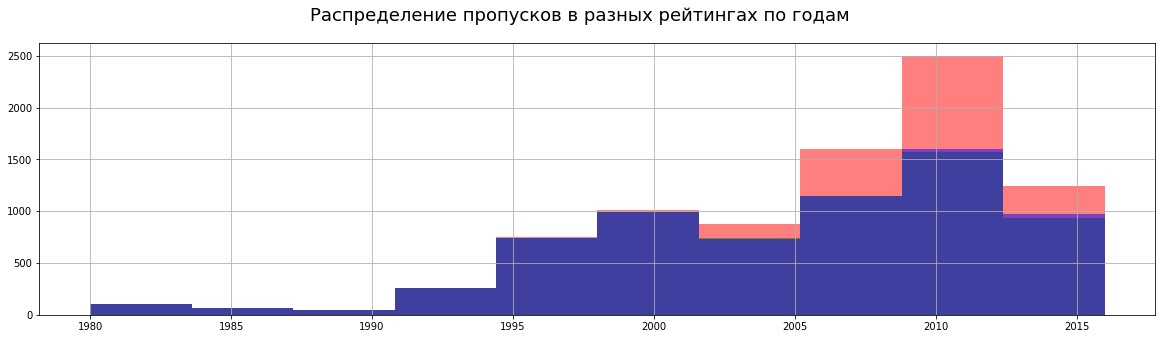

In [11]:
fig, ax = plt.subplots( figsize=[20,5])
games.loc[games['critic_score'].isna(),'year_of_release'].hist(alpha=0.5,color='red')

games.loc[games['user_score'].isna(),'year_of_release'].hist(alpha=0.5, color='green')

games.loc[games['rating'].isna(),'year_of_release'].hist(alpha=0.5, color='blue')

fig.suptitle('Распределение пропусков в разных рейтингах по годам',fontsize=18)
plt.show()

Было предположение, что рейтинга нет у старых игр, однако это оказалось не так. С каждый годом становилось все больше игр без рейтинга. Возможно это связано с особенностями рейтинговой системы, должно пройти определенное количество лет после выпуска, должно быть получено определенное количество оценок и т.п. Что примечательно, часто рейтинг отсутствует у тех же игр, у которых нет пользовательской оценки, на графике они слились.

В любом случае, пустые значения мы не трогаем, а в заданиях где нужно проводить анализ на основании рейтинга мы будем использовать только строки с заполненными значениями, ведь нас интересуеют только заполннные значения, имеющие смысловую нагркузку. 

Касательно tbd в оценке пользователей и RP в рейтинге. Попробуем в этом проекте другой подход, будем не избавляться от пропусков, а создавать их. Заменим tbd и RP на NaN! Так как по факту это индикатор отсутствия оценки/рейтинга, причина же уже вторична. 

In [12]:
games.loc[games['user_score']=='tbd','user_score'] = np.nan
games.loc[games['user_score']=='tbd']

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

In [13]:
games.loc[games['rating']=='RP','rating'] = np.nan
games.loc[games['rating']=='RP']

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

In [14]:
# переименуем рейтинг K-A на E
games.loc[games['rating']=='K-A','rating'] = 'E'
games.loc[games['rating']=='K-A']

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

Теперь поменяем типы данных.

`year_of_release` сделаем целочисленным числом, ноль после запятой явно лишний. 
`user_score` приведем к одному формату с оценками критиков (умножим на 10) и поменяем формат на целочисленный (как и у оценок критиков)

In [15]:
games.year_of_release=games.year_of_release.astype('int64')
games.user_score = games.user_score.astype('float64')
games.user_score = games.user_score * 10
# нужно выбрать именно Int64 с большой буквы, чтобы обработались и пустые значения
games.user_score = games.user_score.astype('Int64')
games.critic_score = games.critic_score.astype('Int64')
games.sample(3)

name platform  year_of_release    genre  \
1409    Deus Ex: Human Revolution     X360             2011  Shooter   
1825  Call Of Duty 2: Big Red One       XB             2005  Shooter   
7177                 Dino Stalker      PS2             2002  Shooter   

      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1409      0.76      0.47      0.02         0.12            89          83   
1825      0.66      0.40      0.00         0.05            78          51   
7177      0.07      0.06      0.08         0.02            50          63   

     rating  
1409      M  
1825      T  
7177      M

In [16]:
# добавляю суммарные продажи
games.insert(8,'total_sales',games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])
games.sample(3)

name platform  year_of_release      genre  na_sales  \
14590          Tenka-bito      PS2             2006   Strategy      0.00   
16665  Sweet Honey Coming      PS2             2009  Adventure      0.00   
10091          Spy vs Spy       XB             2005     Action      0.08   

       eu_sales  jp_sales  other_sales  total_sales  critic_score  user_score  \
14590      0.00      0.03          0.0         0.03          <NA>        <NA>   
16665      0.00      0.01          0.0         0.01          <NA>        <NA>   
10091      0.02      0.00          0.0         0.10            53          80   

      rating  
14590    NaN  
16665    NaN  
10091      T

## Вывод

Данные подготовлены для дальнейшего анализа. 

Название столбцов приведено к нижнему регистру, призведена замена типов данных в годе выпуска,  оценках критиков и пользователей (так же оценки приведены к единому формату), удалены пропуски в годе выпуска, добавлен столбец с общими продажами, объединены два одинаковых по смыслу, но разных по названию рейтинга.

# Шаг 3. EDA

Изучим сколько игр выпускалось в разные годы, и посмотрим на динамику по платформам. Постепенно определимся какой период нам зафиксировать для дальнейшего анализа и какие платформы в этом анализе будут учавствовать.  
Для анализа применим знания из изученных спринтов, а так же применим метод crosstab (аналог pivot_table). Начнем с последнего.

In [17]:
pd.crosstab(games.platform, games.year_of_release, margins=True, margins_name="Total")

year_of_release  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  \
platform                                                                      
2600                9    46    36    11     1     1     2     6     2     2   
3DO                 0     0     0     0     0     0     0     0     0     0   
3DS                 0     0     0     0     0     0     0     0     0     0   
DC                  0     0     0     0     0     0     0     0     0     0   
DS                  0     0     0     0     0     1     0     0     0     0   
GB                  0     0     0     0     0     0     0     0     1    10   
GBA                 0     0     0     0     0     0     0     0     0     0   
GC                  0     0     0     0     0     0     0     0     0     0   
GEN                 0     0     0     0     0     0     0     0     0     0   
GG                  0     0     0     0     0     0     0     0     0     0   
N64                 0     0     0     0     0     0     0     0     0     0   
NES                 0     0     0     6    13    11    19    10    11     5   
NG                  0     0     0     0     0     0     0     0     0     0   
PC                  0     0     0     0     0     1     0     0     1     0   
PCFX                0     0     0     0     0     0     0     0     0     0   
PS                  0     0     0     0     0     0     0     0     0     0   
PS2                 0     0     0     0     0     0     0     0     0     0   
PS3                 0     0     0     0     0     0     0     0     0     0   
PS4                 0     0     0     0     0     0     0     0     0     0   
PSP                 0     0     0     0     0     0     0     0     0     0   
PSV                 0     0     0     0     0     0     0     0     0     0   
SAT                 0     0     0     0     0     0     0     0     0     0   
SCD                 0     0     0     0     0     0     0     0     0     0   
SNES                0     0     0     0     0     0     0     0     0     0   
TG16                0     0     0     0     0     0     0     0     0     0   
WS                  0     0     0     0     0     0     0     0     0     0   
Wii                 0     0     0     0     0     0     0     0     0     0   
WiiU                0     0     0     0     0     0     0     0     0     0   
X360                0     0     0     0     0     0     0     0     0     0   
XB                  0     0     0     0     0     0     0     0     0     0   
XOne                0     0     0     0     0     0     0     0     0     0   
Total               9    46    36    17    14    14    21    16    15    17   

year_of_release  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
platform                                                                      
2600                0     0     0     0     0     0     0     0     0     0   
3DO                 0     0     0     0     1     2     0     0     0     0   
3DS                 0     0     0     0     0     0     0     0     0     0   
DC                  0     0     0     0     0     0     0     0     7    14   
DS                  0     0     0     0     0     0     0     0     0     0   
GB                  3     9     7     0     3     4     6     8     8    11   
GBA                 0     0     0     0     0     0     0     0     0     0   
GC                  0     0     0     0     0     0     0     0     0     0   
GEN                 1     1     6     7    12     0     0     0     0     0   
GG                  0     0     1     0     0     0     0     0     0     0   
N64                 0     0     0     0     0     0    18    49    77   102   
NES                 8     7     3     4     1     0     0     0     0     0   
NG                  0     0     0     2     4     4     2     0     0     0   
PC                  0     0     5     0     6     2     4     6     8     7   
PCFX                0     0     0     0     0    

На первый взгляд получившаяся таблица выглядит очень громоздко, но в тоже время она достаточна информативна. Можно увидеть как с каждым годом растет количество выпускаемых игр (хотя после 2009 видим обратный тренд, с последующим плато в районе +-600 игр в год), и, что более важно, то как устаревают платформы. 

Касательно устаривания платформ, в таблице выше видно, что единственная платформа которая не подвержена устареванию это PC. Что не удивительно, потому что "железо" для компьютера обновить можно, в то время как для приставки это невозможно. Для остальных же срок жизни составлял около 4-7 лет. Стоит отметить, что это не касалось предшественников самых новых и популярных консолей. Таких как xbox 360, PS 2/3, PSP и Wii. Эти платформы оставались актуальными +- 10 лет. 

In [18]:
# Дополнительно, для точности, посчитаем срок жизни каждой платформы и определим год её рождения
platform_list = games['platform'].unique().tolist()

data = []
first_year = []
for platform in platform_list:
    lifetime = len(games.loc[games['platform'] == platform,'year_of_release'].unique())
    year = games.loc[games['platform'] == platform,'year_of_release'].min()
    data.append(lifetime)
    first_year.append(year)

In [19]:
platform_list = pd.Series(platform_list, name='platform')
data = pd.Series(data, name='lifetime')
first_year = pd.Series(first_year, name='first_year')

platforms_lifetime = pd.concat([platform_list, data, first_year],axis=1)

platforms_lifetime = platforms_lifetime.sort_values(by='lifetime')
platforms_lifetime.sample(3)

platform  lifetime  first_year
4      X360        12        2005
22      PSV         6        2011
26       NG         4        1993

In [20]:
avg_platform_lifetime = platforms_lifetime['lifetime'].mean()
print('Средний срок жизни платформы {:.2} лет'.format(avg_platform_lifetime))

Средний срок жизни платформы 7.7 лет


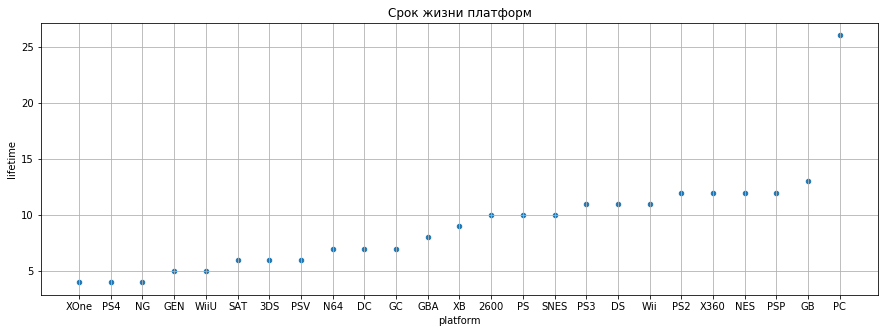

In [21]:
# Попробуем получить более точные цифры, для начала построим график
platforms_lifetime.query('lifetime>3').plot(kind='scatter', 
                                            x='platform', 
                                            y='lifetime', 
                                            figsize=(15,5),
                                           grid=True,
                                            title='Срок жизни платформ');

In [22]:
# ПК вне конкуренции, жил жив и будет жить, уберем его из расчетов
# кроме того, нужно убрать еще "живие" платформы
platform_to_exclude = ['PC', 'XOne', 'PS4', '3DS', 'WiiU', 'PSV']
avg_platform_lifetime = platforms_lifetime \
    .loc[~platforms_lifetime['platform'].isin(platform_to_exclude),'lifetime'].mean()
print('Средний срок жизни платформы (v.2) {:.2} лет'.format(avg_platform_lifetime))

Средний срок жизни платформы (v.2) 7.5 лет


Большой разницы не получилось. 

Попробуем разбить на периоды. Наше тысячелетие и прошлое.

In [23]:
avg_platform_lifetime = platforms_lifetime.query('first_year >= 2000') \
    .loc[~platforms_lifetime['platform'].isin(platform_to_exclude), 'lifetime'].mean()
print('Средний срок жизни платформы выпущенной после 2000 - {} лет'.format(avg_platform_lifetime))

Средний срок жизни платформы выпущенной после 2000 - 10.25 лет


In [24]:
avg_platform_lifetime = platforms_lifetime.query('first_year < 2000') \
    .loc[~platforms_lifetime['platform'].isin(platform_to_exclude), 'lifetime'].mean()
print('Средний срок жизни платформы выпущенной до 2000 - {:.2f} лет'.format(avg_platform_lifetime))

Средний срок жизни платформы выпущенной до 2000 - 6.18 лет


При таком подходе разница уже более ощутима. 4 года. Как и было отмечено ранее, со временем платформы стали жить дольше.

Далее, представим графически продажи и количество релизов по годам. Увидим наглядно как менялось общее количество релизов и суммарные продажи.

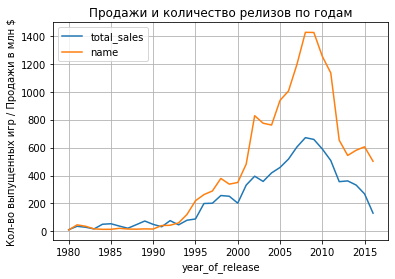

In [25]:
games.groupby('year_of_release')['total_sales'].sum().plot(legend=True, title='Продажи и количество релизов по годам')
games.groupby('year_of_release')['name'].count().plot(legend=True, grid=True)
plt.ylabel('Кол-во выпущенных игр / Продажи в млн $')
plt.show()

Примечательно, что несмотря на резкий рост релизов в начале 2000-х, выручка от продаж игр выросла не на столько сильно. В последнее время и вовсе наблюдается значительное сокращение продаж, до уровня поздних девяностых. 

Кроме этого, изучим продажи по годам по платформам с наибольшими продажами. Для этих целей можно использовать метод `groupby()`, однако мы попробуем что-то новенькое, а именно `sidetabel`. 
Для выбора платформ с наибольшими суммарными продажами укажем отсчеку в 60% (*подбиралась эксперементальным путем, чтобы в выборку попали платформы с наиболее значимой долей от общих продаж*). 

platform  total_sales  Percent  Cumulative total_sales  Cumulative Percent
0      PS2      1233.56     0.14                 1233.56                0.14
1     X360       961.24     0.11                 2194.80                0.25
2      PS3       931.34     0.11                 3126.14                0.35
3      Wii       891.18     0.10                 4017.32                0.46
4       DS       802.78     0.09                 4820.10                0.55
5   Others      3994.27     0.45                 8814.37                1.00

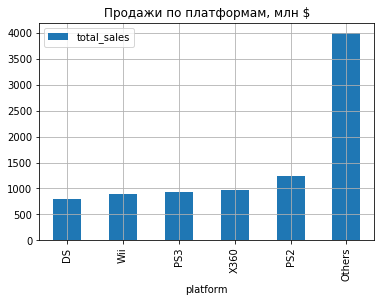

In [26]:
display(games.stb.freq(['platform'], value='total_sales', thresh=.6))
games.stb.freq(
    ['platform'], 
    value='total_sales', 
    thresh=.6
).sort_values(by='total_sales').plot(kind='bar', 
                                    x='platform', 
                                    y='total_sales', 
                                    grid=True,
                                    title='Продажи по платформам, млн $')

plt.show()

Таким образом, если брать данные за все время, начиная с 1980 года, около 60% продаж пришлось на PS2, X360, PS3, Wii и DS.

Для целей последющего анализа некорректно опираться на данные за все время. Например PS2, лидер по продажам за все времена, уже сильно устарела, значит нам необходимо проделать примерно такое же упражнения, но на срезе с более актуальными данными.

Учитывая данные из первой **большой** таблицы и график релизов/продаж, для целей последующего анализа выберем промежуток с 2012 года. Время когда закончился наиболее прибыльныq период для индустрии. Кроме того, таким образом мы получим примерно равное количество игр в каждому году и в выборке будут представлены наиболее популярные на данный момент платформы. Старые же данные нас не интересуют, так как для нашей цели объективно не интересно сколько игр было выпущено для устаревших консолей. 

In [27]:
games_from_2012 = games.query('year_of_release >= 2012')

In [28]:
pd.crosstab(games_from_2012.platform, 
            games_from_2012.year_of_release,
            values=games_from_2012.total_sales,
            aggfunc='sum',
            margins=True, margins_name="total"
           ).sort_values(by='total', ascending=False)


year_of_release    2012    2013    2014    2015    2016    total
platform                                                        
total            355.84  361.24  331.53  267.98  129.94  1446.53
PS4                 NaN   25.99  100.00  118.90   69.25   314.14
PS3              107.36  113.25   47.76   16.82    3.60   288.79
X360              99.74   88.58   34.74   11.96    1.52   236.54
3DS               51.36   56.57   43.76   27.78   15.14   194.61
XOne                NaN   18.96   54.07   60.14   26.15   159.32
WiiU              17.56   21.65   22.03   16.35    4.60    82.19
PC                23.22   12.38   13.28    8.52    5.25    62.65
PSV               16.19   10.59   11.90    6.25    4.25    49.18
Wii               21.71    8.59    3.75    1.14    0.18    35.37
DS                11.01    1.54     NaN     NaN     NaN    12.55
PSP                7.69    3.14    0.24    0.12     NaN    11.19

По итогам анализа среза видим совсем других лидеров. 

- PS4 - появилась в 2013 году и за не полных четыре года стала лидером по продажам. 
- PS3 - предыдущее поколение приставок Sony после выхода консоли нового поколения стало терять позиции, но тем не менее оказалось на втором месте
- X360 - предыдущее поколение приставок Microsoft, так же как и PS3, с выходом приставки нового поколения стало терять позиции.
- 3DS - единственная портативная консоль в топе, продажи которой с каждым годом уменьшаются
- XOne - конкурент PS4, последнеее поколение консолей от Mocrosoft, по цифрам очевидно, что проигрывает конкуренцию PS4, тем не менее продажи до 2016 растут.

Делаем вывод, что за последнее время продажи растут только у нового поколения приставок - PS4 и XOne. Как правило, это связано с тем, что на старые консоли просто перестают выпускать новые игры. Отдельно посмотрим на количество выпускаемых игр.

In [29]:
pd.crosstab(games_from_2012.platform, 
            games_from_2012.year_of_release,
            margins=True, margins_name="total"
           ).sort_values(by='total', ascending=False)

year_of_release  2012  2013  2014  2015  2016  total
platform                                            
total             653   544   581   606   502   2886
PS3               148   126   108    73    38    493
PSV                53    63   100   110    85    411
3DS                93    91    80    86    46    396
PS4                 0    16    75   137   164    392
X360              106    75    63    35    13    292
PC                 61    38    47    50    54    250
XOne                0    19    61    80    87    247
PSP               106    54    10     3     0    173
WiiU               32    42    31    28    14    147
Wii                31    12     6     4     1     54
DS                 23     8     0     0     0     31

Получаем относительно предсказуемый результат.
На старое поколение платформ (PS3, X360) со временем выпускают все меньше игр, на новое больше.
Заметна плохая ситуация с консолью PSV, не смотря на то что выпускает очень много игр, продажи этой консоли очень малы. Это уже точно не та платформа, упор на которую нужно делать в рекламной компании. 

Можно сделать вывод, что потенциально прибыльные платформы - это платформы нового поколения. PS4, XOne, и среди портативных консолей выделяется 3DS. На них выпускается достаточное количество новых игр и уже в 2015/2016 годах они принесли больше выручки.

In [30]:
promising_platforms = ['PS4','XOne','3DS']

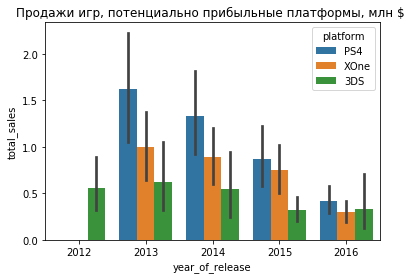

In [31]:
sns.barplot(y='total_sales', 
            x='year_of_release', 
            hue='platform', 
            data = games_from_2012.query('platform in @promising_platforms'),
            hue_order=promising_platforms
           )
plt.title('Продажи игр, потенциально прибыльные платформы, млн $ ')
plt.show()

На столбчатом графике выше виден ранее отмеченный тренд сокращения доходов всей индукстрии. На платформе PS4 это явление сказывается в больше степени.

Далее построим диаграмму размаха по глобальным продажам для этих 3х платформ. Чтобы график был более читабельным ограничим продажи до 4 млн $. 

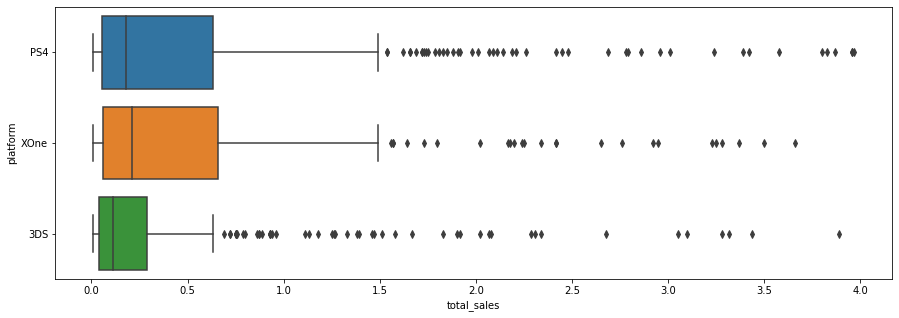

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(y='platform', x='total_sales',
            data = games_from_2012.query('platform in @promising_platforms and total_sales < 4')
            ,order=promising_platforms
           )
plt.show()

Исходя из графика видно, что продажи PS4 и XOne очень похожи на друг друга. Скорее всего это вызвано тем, что многие игры выпускают одновременно и на одну и на другую платформу. Конечно встречаются эксклюзивные релизы, которые выводят PS4 в топ по выручке и количеству игр. Однако, boxplot показывает, что в своем большинстве разброс выручки от игр на PS4 & XOne одинаковый. 
Что касается 3DS, то у неё разброс цен в два раза меньше. Что говорит о том, что консоль уступает по популярности первым двум. 

Далее изучим влияние отзывов критиков и пользователей на продажи игры на платформе PS4. 
Сделаем отдельный df, уберем пропуска в оценках и оставим продажи до 5 млн.

In [33]:
ps4_data = games_from_2012.loc[(games_from_2012['total_sales'] <5) 
                               & (games_from_2012['platform']=='PS4') 
                               & (games_from_2012['critic_score'].notna()) 
                               & (games_from_2012['user_score'].notna())]

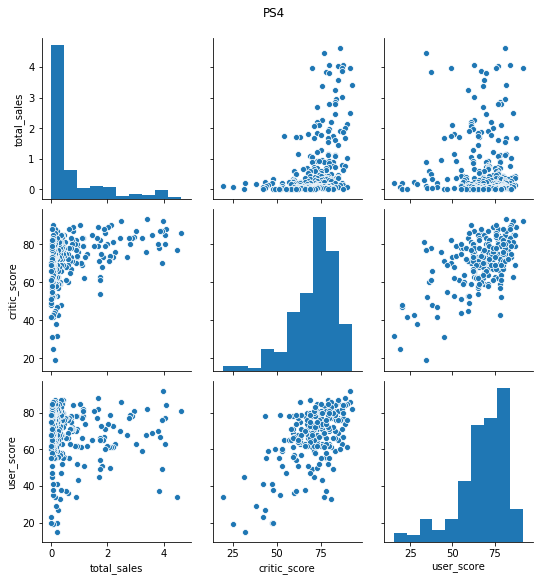

In [34]:
g = sns.pairplot(ps4_data[['total_sales','critic_score', 'user_score']])
g.fig.suptitle('PS4', y= 1.05)
plt.show()

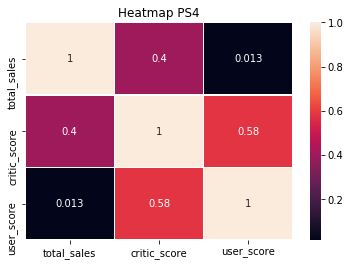

In [35]:
sns.heatmap(ps4_data[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Heatmap PS4');

На основе диаграммы рассеяния и корреляции между отзывами и продажами можно сделать следующий вывод.

*Существует умеренная зависимость между отзывами критиков и продажами*, видно что у значительной части игр с большими продажами нормальные/хорошие отзывы. Плохих отзывов критиков у прибыльных проектов - нет. Что тут от чего зависит конечно сложно сказать, так как крупные и дорогие проекты вкладывают большие деньги в продвижение, в том числе это может повлиять на оценки критиков. 

В свою очередь, *оценки пользователей демонстрируют около нулевую корреляцию*, и на диаграмме рассеяния сложно отметить какие-либо тенденции. Вероятно справедливо такое утверждение - пользователи более критичны в отношении игр. Так как даже у очень успешных в финансовом плане проектов есть плохие оценки пользователей.

Любопытно отметить, что *оценки пользователей имеют не плохую корреляцию с оценками критиков*. Особенно ярко это видно на графике.  То есть, не редки случаи, когда оценки пользователейи критиков совпадают, либо находятся рядом друг с другом.

Посмотрим, справедливо ли это для остальных перспективных платформ, сравним корреляции.

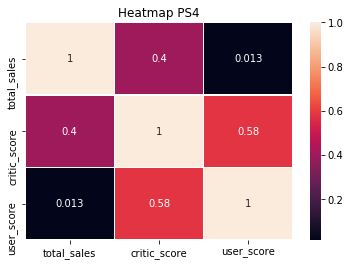

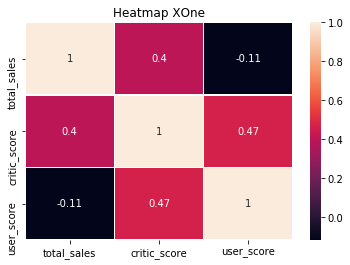

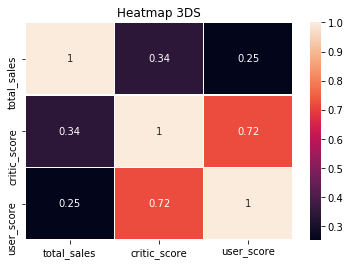

In [36]:
xone_data = games_from_2012.loc[(games_from_2012['total_sales'] <5) 
                               & (games_from_2012['platform']=='XOne') 
                               & (games_from_2012['critic_score'].notna()) 
                               & (games_from_2012['user_score'].notna())]

data_3DS = games_from_2012.loc[(games_from_2012['total_sales'] <5) 
                               & (games_from_2012['platform']=='3DS') 
                               & (games_from_2012['critic_score'].notna()) 
                               & (games_from_2012['user_score'].notna())]
sns.heatmap(ps4_data[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Heatmap PS4')
plt.show()
sns.heatmap(xone_data[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Heatmap XOne')
plt.show()
sns.heatmap(data_3DS[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Heatmap 3DS')
plt.show()

Как и было замечено ранее, PS4 и XOne очень похоже, коэффициенты корреляции так же очень схожи. В то время как на 3DS необходимо посмотреть внимательнее. Здесь более выражена зависимость продаж от оценок пользователей, а так же высокая корреляция у оценок критиков и пользователей. 

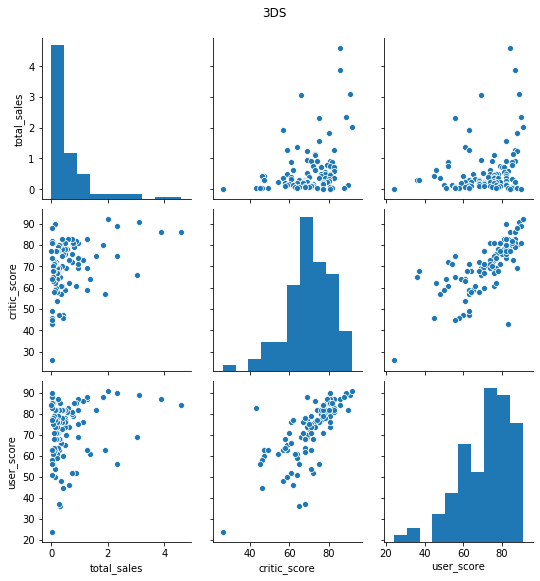

In [37]:
g = sns.pairplot(data_3DS[['total_sales','critic_score', 'user_score']])
g.fig.suptitle("3DS", y=1.05)
plt.show()

И действительно, на графике видим, что оценки пользователей и критиков для платформы 3DS часто совпадают.

Далее изучим распределение игр по жанрам, и определим самый прибыльный жанр. 

In [38]:
games_from_2012.pivot_table(index='genre'
                           ,columns='year_of_release'
                           ,values='total_sales'
                           ,aggfunc='sum'
                           ,margins=True
                           ,margins_name='total').sort_values(by='total', ascending=False)

year_of_release    2012    2013    2014    2015    2016    total
genre                                                           
total            355.84  361.24  331.53  267.98  129.94  1446.53
Action           119.25  122.51   97.23   72.02   30.11   441.12
Shooter           71.75   62.04   65.21   67.51   38.22   304.73
Role-Playing      46.91   44.45   45.62   37.64   18.18   192.80
Sports            30.42   41.17   45.15   40.84   23.49   181.07
Misc              22.22   25.27   23.38   11.57    2.60    85.04
Platform          18.37   24.54    8.81    6.05    3.23    61.00
Racing            13.61   12.37   16.66    8.07    2.79    53.50
Fighting           9.18    7.09   15.85    7.90    4.47    44.49
Simulation        13.36    8.63    5.58    5.66    1.89    35.12
Adventure          5.79    6.09    5.57    8.16    3.82    29.43
Strategy           3.26    6.12    0.98    1.85    1.13    13.34
Puzzle             1.72    0.96    1.49    0.71    0.01     4.89

In [39]:
#выделяем топ-5 прибыльных жанров, чтобы построить график. Если строить все жанры на графике, то будет непонятная мешанина
top_genres=['Action', 'Shooter', 'Role-Playing', 'Sports','Misc']
# тоже самое но без общего, чтобы построить график
sales_by_genres = games_from_2012.query('genre in @top_genres').pivot_table(index='genre'
                           ,columns='year_of_release'
                           ,values='total_sales'
                           ,aggfunc='sum')
#sns.relplot(x='year_of_release', y='total_sales', hue='genre')

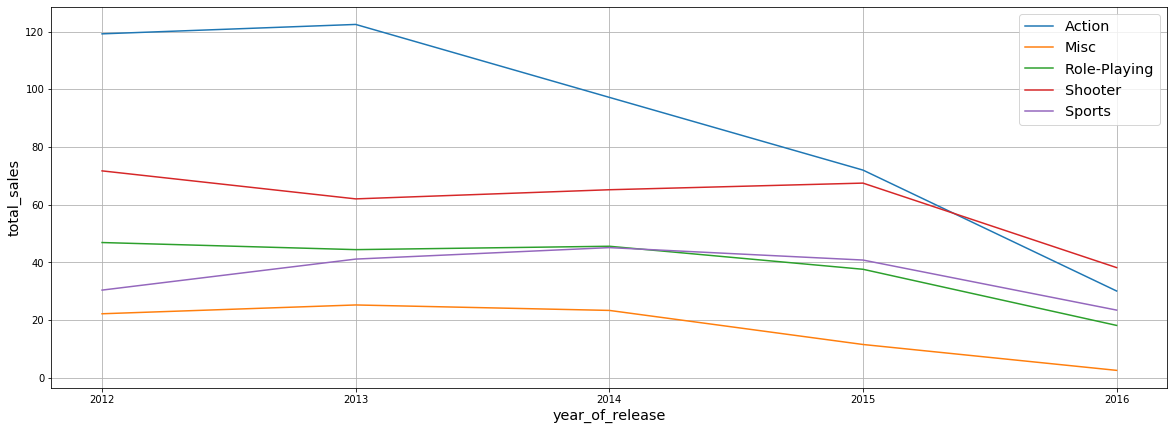

In [40]:
# создадим список для значений по оси х
x_ticks = games_from_2012['year_of_release'].unique()

fig, ax = plt.subplots(figsize=(20,7))
sales_by_genres.T.plot(kind='line',  ax=ax, grid=True, xticks=x_ticks)
plt.ylabel('total_sales',fontsize='x-large')
plt.xlabel('year_of_release',fontsize='x-large')
plt.legend(fontsize='x-large')
plt.show()

Жанр Action испытывает не лучшие времена, с 2013 года испытывает значительное падение. В то время как остальные жанры держатся примерно одинаково, с выраженным падением только в 2016 году, но как мы знаем, за этот год данные предоставлены не в полном объеме. Хотя вряд ли это спасет Action. 

Таким образом, наиболее прибыльным жанром является shooter, затем Sports & Role-Plaing делят второе место. С учетом отрицательной тендеции прошлых лет Action занимает третье место и замыкает Misc.

## Выводы

Общие тенденции в игровой индустрии: после значительного роста, который начался в 90-х, 
количество выпускаемых игр на разные платорфмы и выручка с продаж достигли своего максимума в 2006-2007 годах. 
На протяжении же последних лет выпуск и выручка сократились до уровня конца 90х.

Скорость устаревания старых платформ от 4-7 лет, консоли нового поколения остаются актульаными дольше, до 10 лет. 

Самые прибыльные платорфмы с 1980 года, с порядке убывания популярнсти: PS2, X360, PS3, Wii и DS
На промежутке с 2012 года - PS4, PS3, X360, 3DS, XOne. Из них наиболее перспективные в части прибыли - PS4, XOne и 3DS. 

Диаграмма размаха продемонстрировала, что в большинстве игры на PS4 & XOne продаются в одинаковом коридоре. 
Графики размаха почти идентичны, за исключением выбросов. На PS4 выходит больше экслюзивов.

Существует зависимость умеренная зависимость между оценка критиков и продажами. Критики как правило более благосклонны к играм. 
В то время как зависимость между отзывами пользователей и продажами почти не прослеживается. Пользователи более критичны в своих оценках.
Тем не менее, оценки пользователей и критиков выставляются примерно в одном направлении. 
Если игра имееют отличную оценку от критиков, то с большйодолей вероятности можно сказать что и от пользователей оценка будет как минимум нормальная. 

Самый прибыльный жанр с 2012 года - Shooter, за ним Sports & Role-Plaing, далее Action занимает третье место и замыкает Misc.


# Шаг 4. Составить портрет пользователя каждого региона

Определим, какой он, типичный пользователь в каждом регионе. Начнем с Северной-Америки.

Изучим общие продажи по платформам и выделим топ-5

In [41]:
games_from_2012.stb.freq(['platform'], value='na_sales', thresh=.9)

platform  na_sales  Percent  Cumulative na_sales  Cumulative Percent
0     X360    140.05     0.24               140.05                0.24
1      PS4    108.74     0.18               248.79                0.42
2      PS3    103.38     0.17               352.17                0.60
3     XOne     93.12     0.16               445.29                0.75
4      3DS     55.31     0.09               500.60                0.85
5   Others     90.37     0.15               590.97                1.00

85% рынка приставок занимаются X-Боксы, PS и 3DS.
Отметим, что на долю X-Боксов приходится больше продаж чем на PS в целом. Хотя доля продаж на PS4 немного больше чем у XOne, что может свидетельствовать о смене предпочтений игроков, но пока судить рано и вермя покажет. Посмотрим в динамике по годам.

In [42]:
pd.crosstab(games_from_2012.platform, 
            games_from_2012.year_of_release,
            values=games_from_2012.na_sales,
            aggfunc='sum',
           margins=True,
           margins_name='total').sort_values(by='total', ascending=False)

year_of_release    2012    2013    2014    2015   2016   total
platform                                                      
total            153.26  153.65  132.27  106.86  44.93  590.97
X360              58.39   53.36   20.25    7.36   0.69  140.05
PS4                 NaN   10.13   34.75   42.37  21.49  108.74
PS3               39.88   41.45   16.39    4.99   0.67  103.38
XOne                NaN   11.85   30.97   36.03  14.27   93.12
3DS               17.11   15.56   12.33    6.17   4.14   55.31
WiiU               8.89    9.85   10.50    6.76   2.10   38.10
PC                 8.01    3.88    3.51    2.36   1.36   19.12
Wii               10.89    4.48    1.59    0.43   0.06   17.45
PSV                5.94    2.52    1.98    0.39   0.15   10.98
DS                 4.02    0.57     NaN     NaN    NaN    4.59
PSP                0.13    0.00    0.00    0.00    NaN    0.13

Действительно, пока что абсолютные цифры за Microsoft, однако в последние года Play Station чуть подвинула конкурентов.

Если анализировать причины текущего превосходства Microsoft, то можно предположить, что влияние оказывает такой фактор как патриотизм. Жители Северной Америки могут отдавать предпочтение компании из Америки, нежели из Японии. 

Изучим популярные на этом континенте жанры, добавим немного визуализации. 

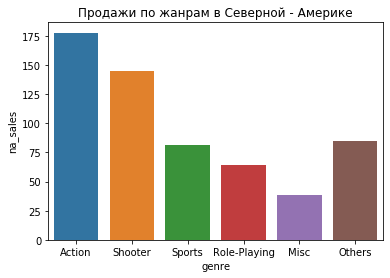

In [43]:
na_genres_dist = games_from_2012.stb.freq(['genre'], value='na_sales', thresh=.86)
sns.barplot(data=na_genres_dist, y='na_sales' , x='genre')
plt.title('Продажи по жанрам в Cеверной - Америке')
plt.show()

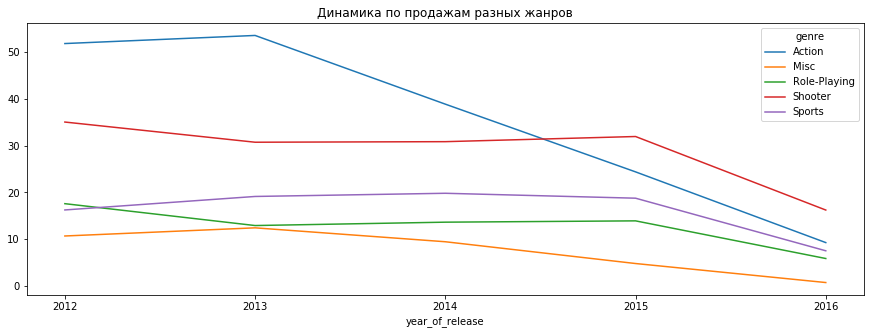

In [44]:
games_from_2012_na_top_genres = games_from_2012.query('genre in ["Action","Shooter","Sports","Role-Playing","Misc"]')
fig, ax = plt.subplots(figsize=(15,5))
pd.crosstab(games_from_2012_na_top_genres.genre, 
            games_from_2012_na_top_genres.year_of_release,
            values=games_from_2012_na_top_genres.na_sales,
            aggfunc='sum').T.plot(ax = ax, xticks=x_ticks)
plt.title('Динамика по продажам разных жанров')
plt.show()

Как было отмечено в предыдущей части работы, жанр Action переживает не лучшие времена. Продажи падают, а может и игр выпускает в принципе меньше. Тем не менее он входит в пятерку лидеров. И сама пятерка такая же как и во всем мире.

Изучим пользователей в Европе. 

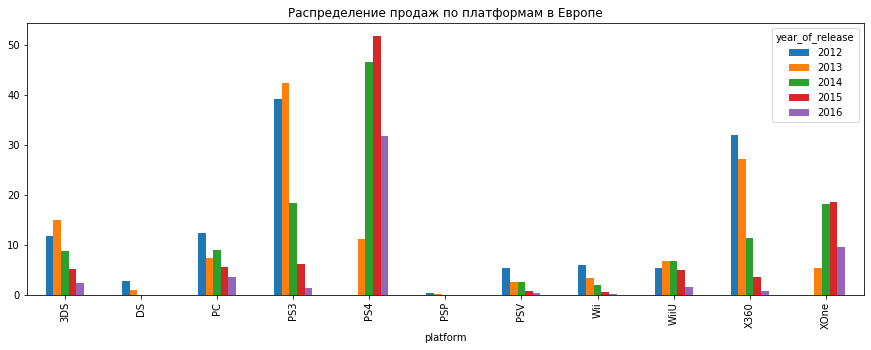

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
pd.crosstab(games_from_2012.platform, 
            games_from_2012.year_of_release,
            values=games_from_2012.eu_sales,
            aggfunc='sum',
           ).plot(kind='bar', ax=ax)
plt.title('Распределение продаж по платформам в Европе')
plt.show()

По графику становится очевидно, что в Европе большей популярностью пользуются Play Station, затем XBox. Чтобы выбрать пятую по полуряности платформу построим таблицу.

In [46]:
games_from_2012.stb.freq(['platform'], value='eu_sales', thresh=.9)

platform  eu_sales  Percent  Cumulative eu_sales  Cumulative Percent
0      PS4    141.09     0.28               141.09                0.28
1      PS3    106.86     0.21               247.95                0.49
2     X360     74.52     0.15               322.47                0.64
3     XOne     51.59     0.10               374.06                0.74
4      3DS     42.64     0.08               416.70                0.82
5       PC     37.76     0.07               454.46                0.90
6   Others     52.36     0.10               506.82                1.00

С небольшим отрывом, как и в глобальном рейтинге, пятое место занимает 3DS.

Посмотрим на предпочтения по жанрам.

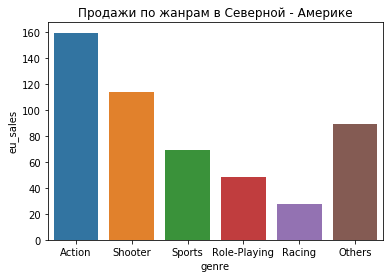

In [47]:
eu_genres_dist = games_from_2012.stb.freq(['genre'], value='eu_sales', thresh=.86)
sns.barplot(data=eu_genres_dist, y='eu_sales' , x='genre')
plt.title('Продажи по жанрам в Cеверной - Америке')
plt.show()

Европейские игроки имеют почти такие же предпочтения, за исключением пятого места, там поместились гонки.

И изучим Японию.

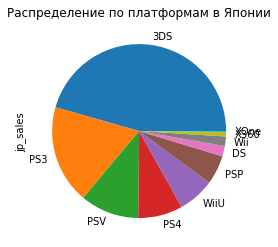

In [48]:
games_from_2012.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie')
plt.title('Распределение по платформам в Японии')
plt.show()

Японцы - странные, все у них не как у людей) Самой большой популярностью пользуются  портативные 3DS, видимо предпочитают играть везде где только можно. Возможно сказывается тот факт, что в Японии проблема с жильем, особенно в больших мегаполисах, и люди таким образом экономят пространство. Примечательно, что американцы и близко не подступились к лидерам.

Теперь в двойне интересно как обстоят дела с жанрами.

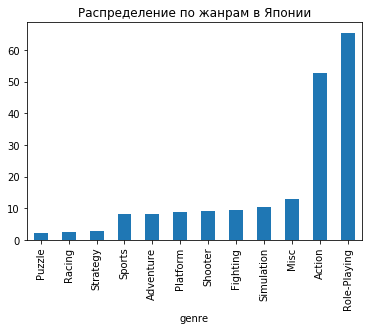

In [49]:
games_from_2012.groupby('genre')['jp_sales'].sum().sort_values().plot(kind='bar')
plt.title('Распределение по жанрам в Японии')
plt.show()

И снова сюрпризы, у японцев топ-5 отличается от Европы и Америки.  

Подведем итоги по всем направлениям, соберем полученные данные в один df.

In [50]:
country = ['North-America','Europe','Japan']
types = ['platform','genre']
index = [1,2,3,4,5]
data = [
    [[['X360'],['Action']],[['PS4'],['Action']],[['3DS'],['Role-Playing']]],
    [[['PS4'],['Shooter']],[['PS3'],['Shooter']],[['PS3'],['Action']]],
    [[['PS3'],['Sports']],[['X360'],['Sports']],[['PSV'],['Misc']]],
    [[['XOne'],['Role-Playing']],[['XOne'],['Role-Playing']],[['PS4'],['Simulation']]],
    [[['3DS'],['Misc']],[['3DS'],['Racing']],[['WiiU'],['Fighting']]]
]
data = np.array(data).reshape(len(index), len(types) * len(country))
multi_columns = pd.MultiIndex.from_product([country, types])
users_preferences = pd.DataFrame(data, index=index, columns=multi_columns)
print('Топ-5 консолей и жанров в разных регионах')
display(users_preferences)

Топ-5 консолей и жанров в разных регионах


North-America                 Europe                  Japan              
       platform         genre platform         genre platform         genre
1          X360        Action      PS4        Action      3DS  Role-Playing
2           PS4       Shooter      PS3       Shooter      PS3        Action
3           PS3        Sports     X360        Sports      PSV          Misc
4          XOne  Role-Playing     XOne  Role-Playing      PS4    Simulation
5           3DS          Misc      3DS        Racing     WiiU      Fighting

И изучим влияние рейтинга игры на продажу.

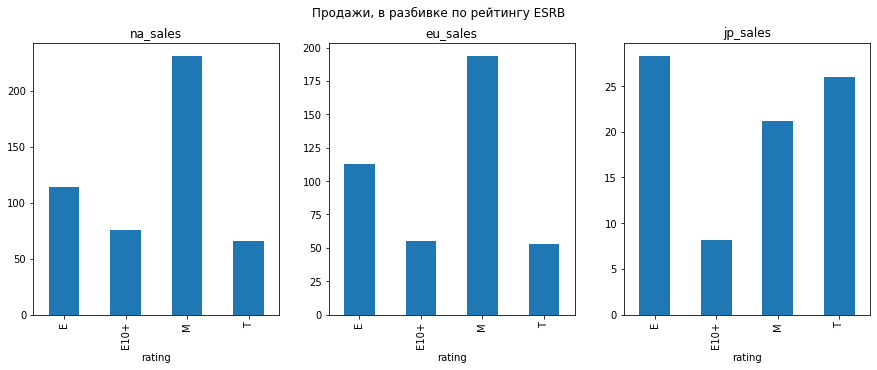

In [51]:
sales = ['na_sales', 'eu_sales', 'jp_sales']
countries = ['C-A', 'Europe','Japan']
fig, axs = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Продажи, в разбивке по рейтингу ESRB')
for i, sale in enumerate(sales):
    for country in countries:
        games_from_2012.groupby('rating')[sale].sum().plot(kind='bar', ax=axs[i], title=sale)


## Вывод

В итоге, в Северной-Америке предпочитают поддерживать регионального производителя - Miscrosoft. И отдают предпочтение классическим консолям. Как и в Европе, там тоже предпочитают классику, но больше доверяют Play Station. В то время как в Японии наблюдается тотальное доминирование отечестветнного производителя, но с уклоном на портативность. 

Касательно жанров, первые две группы пользователей практически полностью повторяют выбор друг друга. За исключением 5ого места. В то время как Японцы вывели в топ два совершенно далеких для нового и старого света жанров. 

Исторически сложилось противостояние PS и X-Box, как правило PS выигрывает за счет большего количества эксклюзивных игр. Однако, как мы увидели, региональные особенности так же имеют место быть. Может быть ценовая политика в разнцых странах отличается, маректинг и т.п. Например в одной из статей былы отмечены различия в позиционировании консолец. PS4 - полностью игровая платформа, в то время как X-Box медиацентр, но не все его сервесы доступны для пользователей за пределами США, что делает её менее предпочтительной по сравнению с PS в Европе, не говоря о Японии.

Касательно влияния рейтингов на продажи. 

В С-Америке и Европе наибольшим спросом пользуются игры с рейтингом M (для взрослых), в то время как в Японии популярны рейтинги E (для всех), T (подростки) и М практически в равной степени.


# Шаг 5. Проверка гипотез

Приступим к проверке гипотиз. 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- **H0** - повторяет проверяемую гипотезу. Рейтинги пользователей платформ Xbox One & PC равны
- **H1** - рейтинги не равны

Таким образом, мы будем проверять две выборки совокупности на равенство их средних. 
Уровень значимости - 5%

Прежде всего проверим наши распеределения на нормальность

In [52]:
xbox_population = games_from_2012.loc[(games_from_2012['platform'] == 'XOne') & (games_from_2012['user_score'].notna())]
pc_population = games_from_2012.loc[(games_from_2012['platform'] == 'PC') & (games_from_2012['user_score'].notna())]

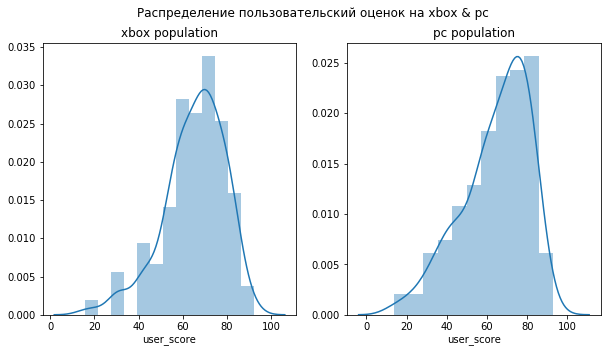

In [53]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle('Распределение пользовательских оценок на xbox & pc')
sns.distplot(xbox_population['user_score'], ax=axs[0]).set_title('xbox population');
sns.distplot(pc_population['user_score'], ax=axs[1]).set_title('pc population');

In [54]:
print('xbox')
display(st.shapiro(xbox_population['user_score'])[1])
print('pc')
display(st.shapiro(pc_population['user_score'])[1])

xbox


1.5249203897838015e-05

pc


1.1412866740556638e-07

Построили диграмму распределения и провели тест Шапиро-Вилкса. *(Можно было ограничеться чем-то одним, но для тренировки сделал оба)*

Диаграмма показала, а тест подтвердил, что оба распределения ненормальные. На диграмме мы видим значительное смещение влево, а p-уровень  значимости полученный в ходе тестов оказался очень близок к нулю. Таким образом была отвергнута нулевая гипотеза, что выборка взята из нормального распределения. 

Теперь сравним дисперсии наших выборок тестом Левена.

In [55]:
st.levene(xbox_population['user_score'], pc_population['user_score'])

LeveneResult(statistic=6.2952871760692375, pvalue=0.01251484281850554)

Значение теста Левена не позволяет отвергнуть гипотизу о равенстве дисперсия, соответственно признаем что дисперсии наших выборок приблизительно равны. 

Теперь проверим наши основные гипотезы, о равенстве средных оценок пользователей. 
Так как мы признали равенство дисперсий, и у нас достаточное количество наблюдений (>30), то можно провести тесть Стьюдента, в тоже время, распределение ненормальное, и можно использовать критерий Манна-Уитни.

Проведем оба теста и сравним результаты. 

In [56]:
mannwhitneyu_test = st.mannwhitneyu(xbox_population['user_score'], pc_population['user_score'], alternative='two-sided')[1]

In [57]:
ttest = st.ttest_ind(xbox_population['user_score'], pc_population['user_score'], equal_var=True)[1]

In [58]:
print('p-value теста Манна-Уитни {:.10f}'.format(mannwhitneyu_test))
print('p-value теста Стьюдента {:.10f}'.format(ttest))

p-value теста Манна-Уитни 0.8649062975
p-value теста Стьюдента 0.5535080501


In [59]:
xbox_mean = xbox_population['user_score'].mean().round(2)
pc_mean = pc_population['user_score'].mean().round(2)
print('Среднее выборочное значение пользовательского рейтинга xbox one -', xbox_mean)
print('Среднее выборочное значение пользовательского рейтинга pc -', pc_mean)

Среднее выборочное значение пользовательского рейтинга xbox one - 65.21
Среднее выборочное значение пользовательского рейтинга pc - 64.29


Оба теста показали значение p-value больше уровня значимости. Следовательно мы не можем отвергнуть нулевую гипотизу.
Это значит, что **средний пользовательский рейтинг платформ Xbox One & PC равны**.

Приступим к проверке следующей гипотизы. 

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- H0 - средний пользовательский рейтинг жанра Action равен рейтингу Sports
- H1 - средние пользовательиские рейтинги этих жанров не равны.

Уровень значимости - 5%

In [60]:
action_population = games_from_2012.loc[(games_from_2012['genre'] == 'Action') & (games_from_2012['user_score'].notna())]
sports_population = games_from_2012.loc[(games_from_2012['genre'] == 'Sports') & (games_from_2012['user_score'].notna())]

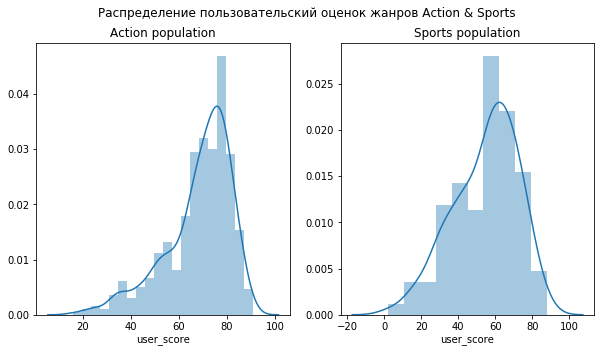

In [61]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle('Распределение пользовательский оценок жанров Action & Sports')
sns.distplot(action_population['user_score'], ax=axs[0]).set_title('Action population')
sns.distplot(sports_population['user_score'],ax=axs[1]).set_title('Sports population')
plt.show()

В данном случае ограничимся только визуальной оценкой распределений. По графикам видно, что распределение ненормальное. Применим критерий Манна_Уитни

In [62]:
mannwhitneyu_test2 = st.mannwhitneyu(action_population['user_score'], sports_population['user_score'], alternative='two-sided')[1]

In [63]:
print('p-value теста Манна-Уитни {:.25f}'.format(mannwhitneyu_test2))

p-value теста Манна-Уитни 0.0000000000000000000000114


In [64]:
action_mean = action_population['user_score'].mean().round(2)
sports_mean = sports_population['user_score'].mean().round(2)
print('Среднее выборочное значение пользовательского рейтинга жанра Action -', action_mean)
print('Среднее выборочное значение пользовательского рейтинга жанра Sports -', sports_mean)

Среднее выборочное значение пользовательского рейтинга жанра Action - 68.25
Среднее выборочное значение пользовательского рейтинга жанра Sports - 54.56


р- уровень значимости оказалась оооооооооочень маленкьим, практически нулевым, отклоняем нулевую гипотезу. 

Следовательно, **средний пользовательский рейтинг проверяемых жанров отличается**. 

## Вывод

Итоги проверки двух гипотиз:
1. `Средние пользовательские рейтинги платформ Xbox One и PC одинаковые` - **TRUE**
2. `Средние пользовательские рейтинги жанров Action и Sports разные` - **TRUE**


#  Шаг 6. Общий вывод

В ходе проделанной работы были изучены и обработаны данные по продажам игр с 1980х годов:
- обработаны пропуски/изменен регистр названий колонок/изменен тип данных
- рассчитан общий объем продаж каждой игры
- установлено сокращение количеста выпускаемых игр и продаж за последнией 10 лет
- определена скорость устаревания платформ, в прошлом платформы устаревали за 4-7 лет, современные платформы существуют дольше, до 10 лет
- опреелены самые прибыльные платформы за все время - PS2, X360, PS3, Wii и DS
- на текущий момент существуют две доминирующие консоли, от Microsoft и от Sony. На данный момент Sony в совокупности заработало больше
- установлено, что у многих успешных игр был высокий рейтинг критиков, в то время как рейтинг пользователей пояти не коррелирует с продажами
- исследованы предпочтения игроков из трех разных регионов. Поведение игроков из С-Америки похоже на Европу, предпочитают почти что одинаковые жанры, но играют на разных платформах. Например, в Европе больше предпочтений отдают PS, нежели XBox. Япония выделяется любовью к портативным консолям.
- изучены жанровые препочтения игроков. Топ-5 любимых жанров в С-Америке и Европе похожи, за исключением одной позиции (action, shooter, sports, role-playing). В Японский топ попали такие жанры как Fighting и Simulation, а на первое место вышел Role-Playing.  
- проверены две гипотезы, установлено, что средние пользовательские рейтинги XBox One и PC не отличаются и средние пользовательские рейтинги жанров ACtion и Sports разные 

В заключении обсудим факторы, влияющие на успех игры. 

Прежде всего необходимо понимать, что для разных регионов должна быть выбрана разная стратегия. Так как предпочтения пользователей, например, в Америке и Японии имеют значительные отличия. Начиная от выбора платформы, заканчивая жанрами.

Тем не менее, попробуем собрать факторы, которые помогут определить будет ли игра успешной в коммерчеком плане. В ближайшем году нужно сфокусироваться на самых актуальных платформах - X-Box One, PS4 и 3DS. 
Топ-5 популярных жанров в мире - Action, Shooter, Sports, Role-Playing, Misc. Предпочтение следует отдавать играм с рейтингом M и высоким рейтингом критиков, такие игры чаще становятся кассовыми.  